<a href="https://colab.research.google.com/github/madhugupta03/Project-Big-Mart-Sales-Prediction/blob/main/BigMart_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALES PREDICTION FOR BIG MART OUTLETS

### **Problem Statement** 

The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, Big Mart will try to understand the properties of products and stores which play a key role in increasing sales. So the idea is to find out the properties of a product, and store which impacts the sales of a product.

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
print("The modules are imported")


The modules are imported


## **Importing Training Dataset**

In [ ]:
path = "Training Dataset.xlsx"
train_data = pd.read_excel(path)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Importing Testing Dataset**

In [ ]:
path = "/content/Testing Dataset.xlsx"
test_data = pd.read_excel(path)
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## **Making a copy of training and testing datasets**

In [ ]:
train_original = train_data.copy()
test_original  = test_data.copy()
print("The datasets are successfully copied.")

The datasets are successfully copied.


## **To check the feature names of the training dataset**


In [ ]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## **To check the feature names of the testing dataset**




In [ ]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

## **Missing Values Imputation**

Listing feature-wise count of missing values

In [ ]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The missing values are present in Item_Weight and in Outlet_Size only. We will treat the missing values one by one.


Before going forward, we'll check if Item_Weight and Outlet_Size have outliers or not.

In [ ]:
# Boxplot for Item_Weight

fig = px.box(train_data, y="Item_Weight")
fig.show()

In [ ]:
train_data["Outlet_Size"].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [ ]:
train_data["Outlet_Size"].replace('Small',0,inplace=True)
train_data["Outlet_Size"].replace('Medium',1,inplace=True)
train_data["Outlet_Size"].replace('High',2,inplace=True)
test_data["Outlet_Size"].replace('Small',0,inplace=True)
test_data["Outlet_Size"].replace('Medium',1,inplace=True)
test_data["Outlet_Size"].replace('High',2,inplace=True)

In [ ]:
train_data["Outlet_Size"]

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

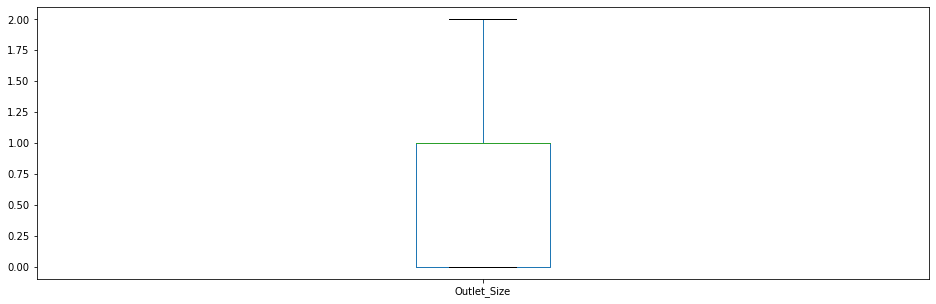

In [ ]:
plt.figure(1)
train_data["Outlet_Size"].plot.box(figsize=(16,5))
plt.show()

Replacing Item_Weight with the mean (since no outliers are present) and Outlet_Size with the mode

In [ ]:
train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean(),inplace=True)

In [ ]:
train_data["Item_Weight"].isnull().sum()

0

In [ ]:
train_data["Outlet_Size"].fillna(train_data["Outlet_Size"].mode()[0],inplace=True)

In [ ]:
train_data["Outlet_Size"].isnull().sum()

0

In [ ]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All missing values are filled.

We observe that for Item_Visibility, the minimum value is 0, which does not make sense. We will consider it as a missing value and impute it with the mean.

In [ ]:
train_data["Item_Visibility"].replace('0',train_data["Item_Visibility"].mean(),inplace=True)

We will fill the missing values in the test dataset also using the same approach.

In [ ]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean(),inplace=True)
test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].median(),inplace=True)
test_data["Item_Visibility"].replace('0',test_data["Item_Visibility"].mean(),inplace=True)

In [ ]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

All missing values are filled in the testing dataset as well.

In [ ]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Since Item_Fat_Content has duplicate values, we will first treat them.


In [ ]:
train_data["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
train_data["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
train_data["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [ ]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Making the same noises in the testing dataset

In [ ]:
test_data["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
test_data["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
test_data["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [ ]:
test_data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

## **Outlier Treatment**

First we will check all those variables that have outliers present in them

The only numerical variables are Item_Weight, Item_Visibility and Item_MRP

In [ ]:
train_data["Item_Weight"].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.560000        2
9.420000        1
5.400000        1
6.520000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64

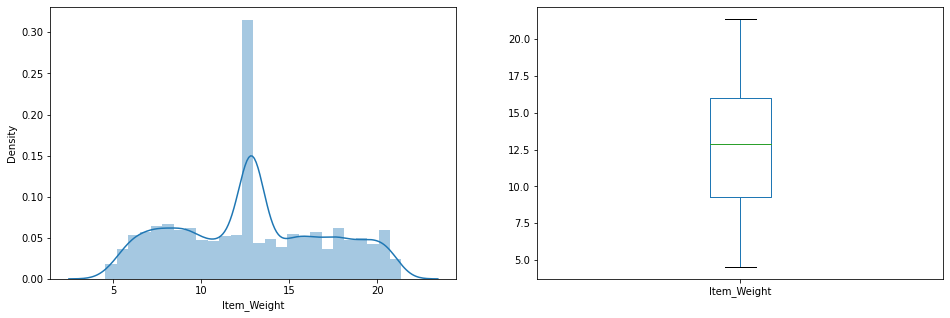

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data["Item_Weight"]);
plt.subplot(122)
train_data["Item_Weight"].plot.box(figsize=(16,5))
plt.show()

No outliers are present in Item_Weight


In [ ]:
train_data["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.107224      2
0.061425      2
0.128296      2
           ... 
0.021469      1
0.060134      1
0.146300      1
0.040637      1
0.022965      1
Name: Item_Visibility, Length: 7880, dtype: int64

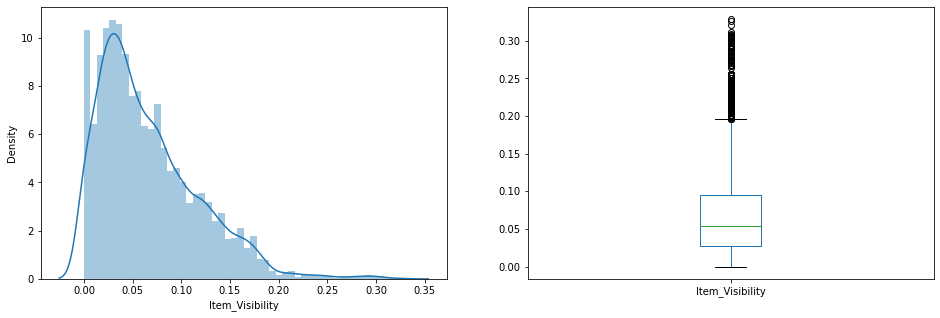

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data["Item_Visibility"]);
plt.subplot(122)
train_data["Item_Visibility"].plot.box(figsize=(16,5))
plt.show()

Item_Visibility is right skewed and many outliers are present.


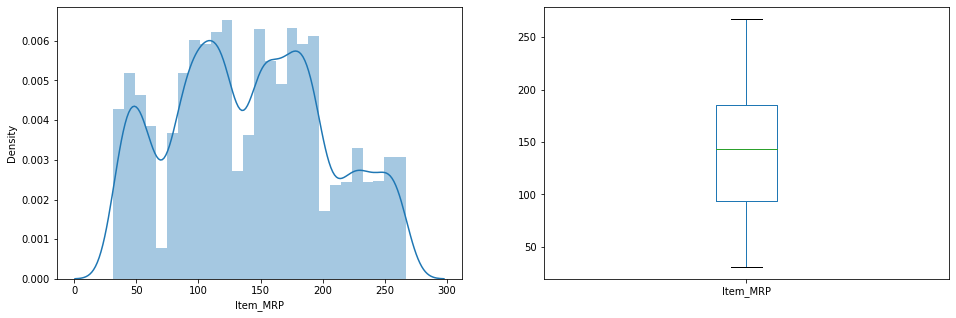

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data["Item_MRP"]);
plt.subplot(122)
train_data["Item_MRP"].plot.box(figsize=(16,5))
plt.show()

No outliers present in Item_MRP

We will treat the outliers for item_visibility


Due to outliers, bulk of the data is on the left tail and the right is longer. This is called right-skewness.
We will remove skewness by doing the log transformation. 
It does not effect the smaller values much but reduces the larger values.
So we can get a distribution closer to Normal Distribution.

Visualizing the effect of log transformation and making similar changes to test dataset.

In [ ]:
train_data["Item_Visibility_log"]=np.log(train_data["Item_Visibility"])
test_data["Item_Visibility_log"]=np.log(test_data["Item_Visibility"])

# **Viewing Data**

* We use df.shape command to get number of 
rows and columns.




In [ ]:
test_data.shape

(5681, 12)

In [ ]:
train_data.shape

(8523, 13)

In test data we have 5681 number of rows and 11 columns. 
And, in train data we have 8523 number of rows and 13 columns.

* To get info about data such as Index, data type and memory information we use df.info() command.

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   float64
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Item_Visibility_log        5681 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 532.7+ KB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Visibility_log        8523 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage:

* To find summary statistics of numerical columns we use df.describe() command on test and train data.

In [ ]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Visibility_log
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903,0.829079,-inf
std,4.245189,0.051252,61.809091,8.372256,0.600328,NaN
min,4.555000,0.000000,31.990000,1985.000000,0.000000,-inf
25%,9.195000,0.027047,94.412000,1987.000000,0.000000,-3.610184
50%,12.695633,0.054154,141.415400,1999.000000,1.000000,-2.915919
75%,15.850000,0.093463,186.026600,2004.000000,1.000000,-2.370194
max,21.350000,0.323637,266.588400,2009.000000,2.000000,-1.128132


From the above use of describe function on test data we have count, mean, max, min, standard deviation, Quartiles (25%, 50% and 75%) associated with the columns in test data.

In [ ]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Visibility_log
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,0.829168,2181.288914,-inf
std,4.226124,0.051598,62.275067,8.371760,0.600327,1706.499616,NaN
min,4.555000,0.000000,31.290000,1985.000000,0.000000,33.290000,-inf
25%,9.310000,0.026989,93.826500,1987.000000,0.000000,834.247400,-3.612308
50%,12.857645,0.053931,143.012800,1999.000000,1.000000,1794.331000,-2.920051
75%,16.000000,0.094585,185.643700,2004.000000,1.000000,3101.296400,-2.358253
max,21.350000,0.328391,266.888400,2009.000000,2.000000,13086.964800,-1.113550


From the above use of describe function on train data we have count, mean, max, min, standard deviation, Quartiles (25%, 50% and 75%) associated with the columns in train data.

* We use df.corr() function that returns the correlation between columns in the dataframe.

In [ ]:
test_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Visibility_log
Item_Weight,1.000000,-0.016380,0.045257,0.013548,-0.014735,-0.008511
Item_Visibility,-0.016380,1.000000,-0.014013,-0.097040,-0.058082,0.905040
Item_MRP,0.045257,-0.014013,1.000000,-0.007233,0.011717,-0.004641
Outlet_Establishment_Year,0.013548,-0.097040,-0.007233,1.000000,-0.193397,-0.087224
Outlet_Size,-0.014735,-0.058082,0.011717,-0.193397,1.000000,-0.043602
Item_Visibility_log,-0.008511,0.905040,-0.004641,-0.087224,-0.043602,1.000000


In [ ]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Visibility_log
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.007225,0.011550,-0.016583
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.069309,-0.128625,0.908460
Item_MRP,0.024756,-0.001315,1.000000,0.005020,-0.006059,0.567574,-0.000250
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.193389,-0.049135,-0.053946
Outlet_Size,0.007225,-0.069309,-0.006059,-0.193389,1.000000,0.086182,-0.055595
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,0.086182,1.000000,-0.102051
Item_Visibility_log,-0.016583,0.908460,-0.000250,-0.053946,-0.055595,-0.102051,1.000000




#**Univariate Analysis**





In this it provides summary statistics for each field in the raw data set or summary only on one variable. Ex : Distribution Plot, Box Plot, Histogram.

* **Distribution Plot :** We draw this using seaborn as sns, Facegrit gives grid layout, train_data variable that we loaded data into. Hue colours the value/columnname that you give to it. Size is graph size and mapping all these to sns.distplot on columns.

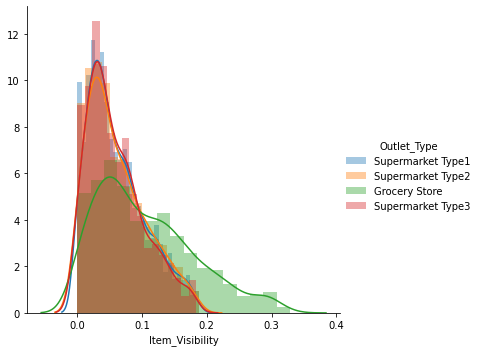

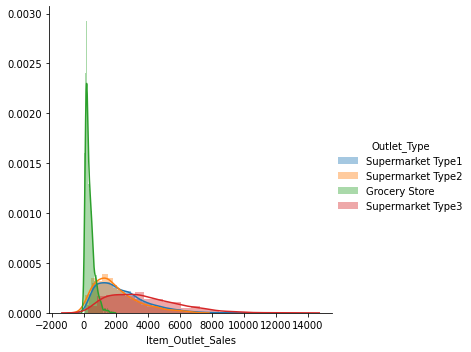

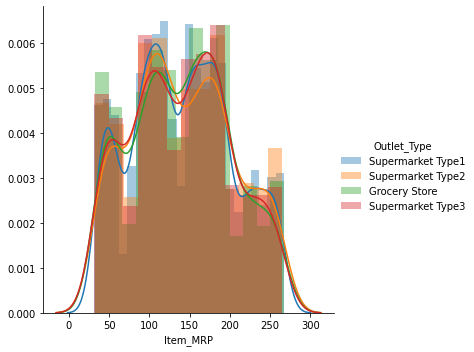

In [ ]:
# distribution Plots
sns.FacetGrid(train_data,hue="Outlet_Type", size = 5).map(sns.distplot, "Item_Visibility").add_legend()
sns.FacetGrid(train_data,hue="Outlet_Type", size = 5).map(sns.distplot, "Item_Outlet_Sales").add_legend()
sns.FacetGrid(train_data,hue="Outlet_Type", size = 5).map(sns.distplot, "Item_MRP").add_legend()

* **Box Plot :** Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

    A box plot consist of 5 things.

    1. Minimum
    2. First Quartile or 25%
    3. Median (Second Quartile) or 50%
    4. Third Quartile or 75%
    5. Maximum

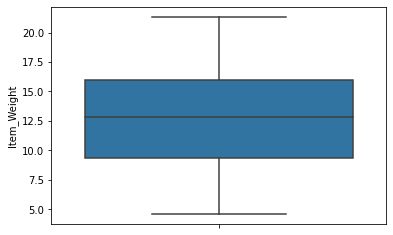

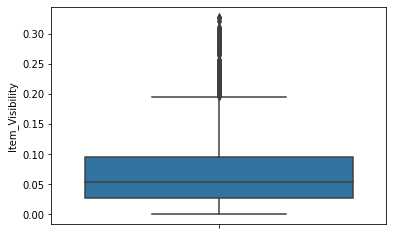

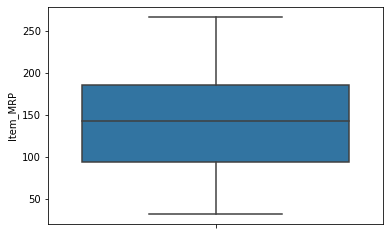

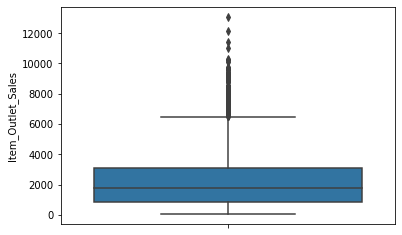

In [ ]:
# Box Plot
sns.boxplot( y=train_data["Item_Weight"] );
plt.show()
sns.boxplot( y=train_data["Item_Visibility"] );
plt.show()
sns.boxplot( y=train_data["Item_MRP"] );
plt.show()
sns.boxplot( y=train_data["Item_Outlet_Sales"] );
plt.show()

* **Histogram :** Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

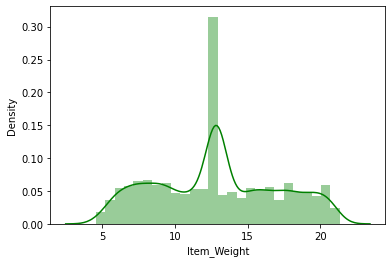

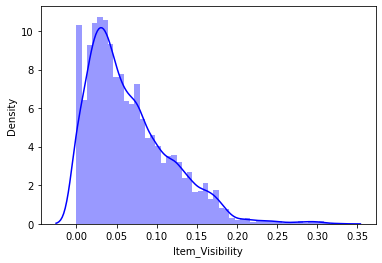

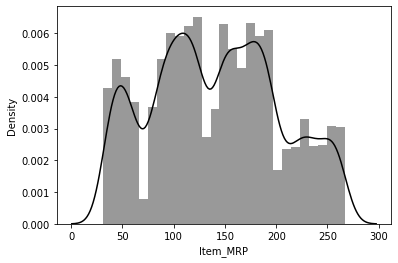

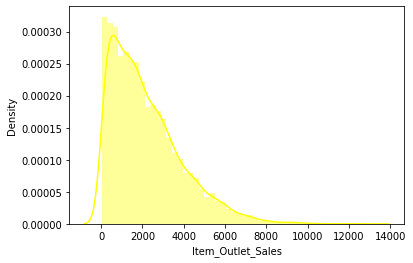

In [83]:
# Histogram
plt.figure(1)
sns.distplot(train_data['Item_Weight'], kde=True, color='green')
plt.show()
sns.distplot(train_data['Item_Visibility'], kde=True, color='blue')
plt.show()
sns.distplot(train_data['Item_MRP'], kde=True, color='black')
plt.show()
sns.distplot(train_data['Item_Outlet_Sales'], kde=True, color='yellow')
plt.show()

# **Univariate Analysis**




Let us first look at the target variable (Outlet_Type). As it is a categorical variable, let us take a look at frequency table of the target variable.

In [ ]:
train_data["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

This Indicates that there are 5577 Supermarket of Type 1 in majority. And the Supermarket of type 2 is at least numbers.

In [ ]:
# Normalize can be set True to print proportions instead of number
train_data["Outlet_Type"].value_counts(normalize=True)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

This indicates that there are 65.43% Supermarket of Type 1, 12.70% are Grocery Stores, 10.97% are Supermarket of Type 3 And 10.88% are Supermarket of Type 2.

8523


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

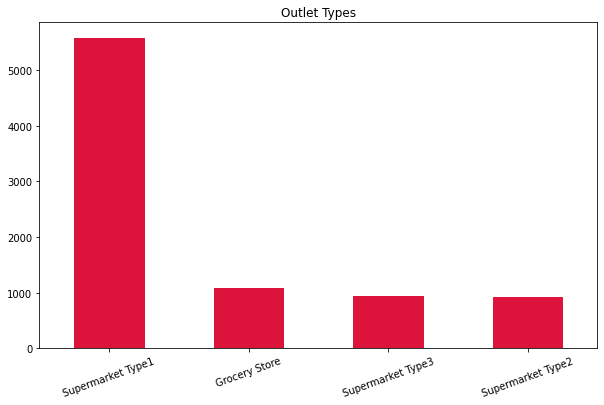

In [78]:
# Plotting the bar chart of Target Variable

print(train_data["Outlet_Type"].value_counts().sum())
plt.figure(figsize=(10,6))
train_data["Outlet_Type"].value_counts().plot.bar(Color="Crimson")
plt.title("Outlet Types")
plt.xticks(rotation=20)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

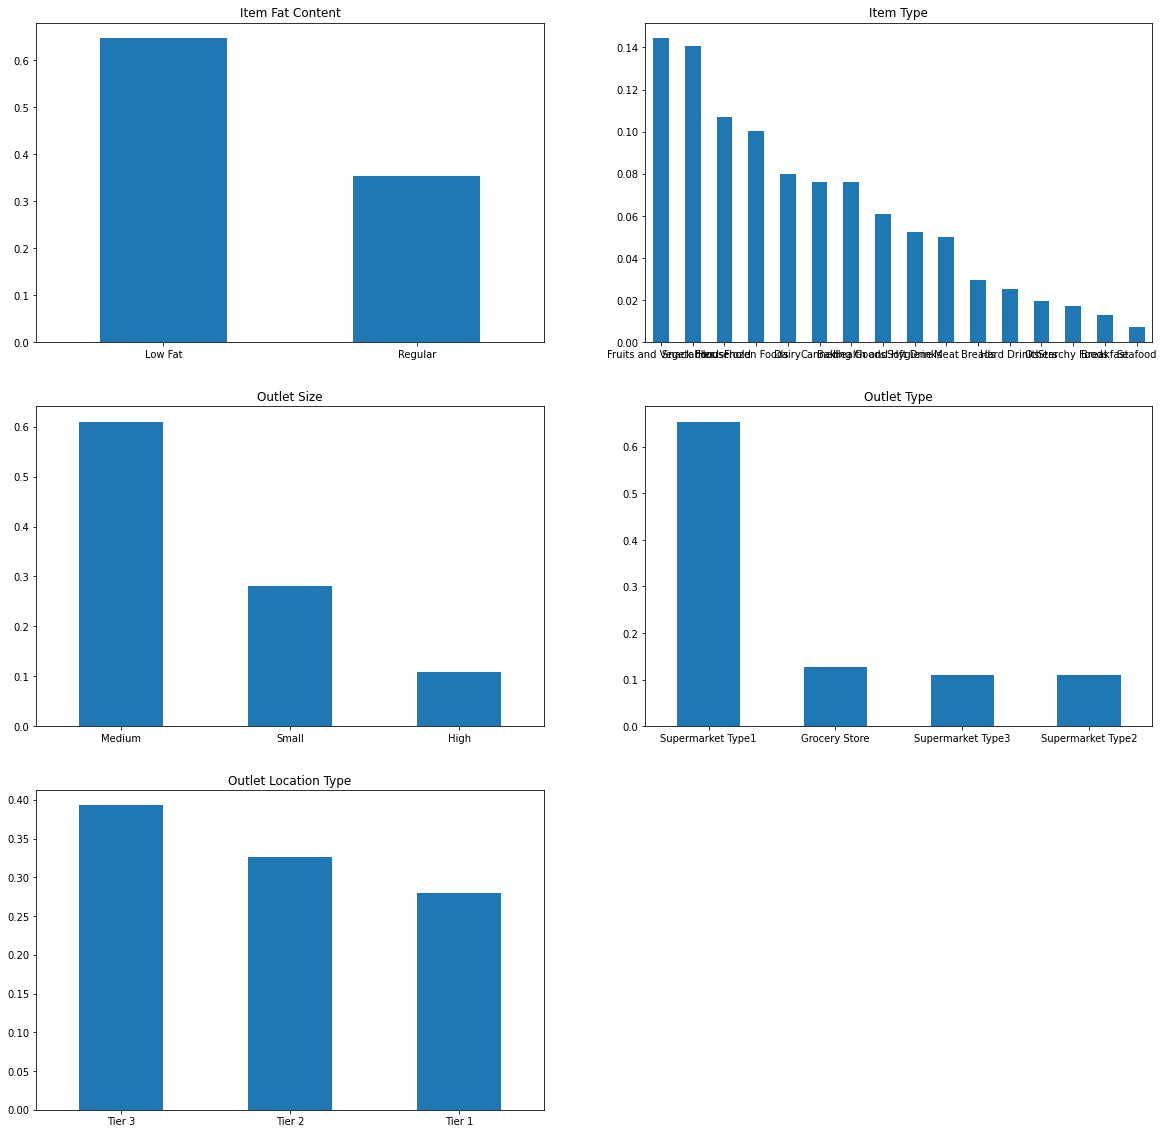

In [84]:
# Plotting the graph for all the categorical Independent Variables 

plt.figure(1)
plt.subplot(3,2,1)
train_data["Item_Fat_Content"].value_counts(normalize=True).plot.bar(figsize=(20,20),title="Item Fat Content")
plt.xticks(rotation=0)

plt.subplot(3,2,2)
train_data["Item_Type"].value_counts(normalize=True).plot.bar(figsize=(20,20),title="Item Type")
plt.xticks(rotation=0)

plt.subplot(3,2,3)
train_data["Outlet_Size"].value_counts(normalize=True).plot.bar(figsize=(20,20),title="Outlet Size")
plt.xticks(rotation=0)

plt.subplot(3,2,4)
train_data["Outlet_Type"].value_counts(normalize=True).plot.bar(figsize=(20,20),title="Outlet Type")
plt.xticks(rotation=0)

plt.subplot(3,2,5)
train_data["Outlet_Location_Type"].value_counts(normalize=True).plot.bar(figsize=(20,20),title="Outlet Location Type")
plt.xticks(rotation=0)

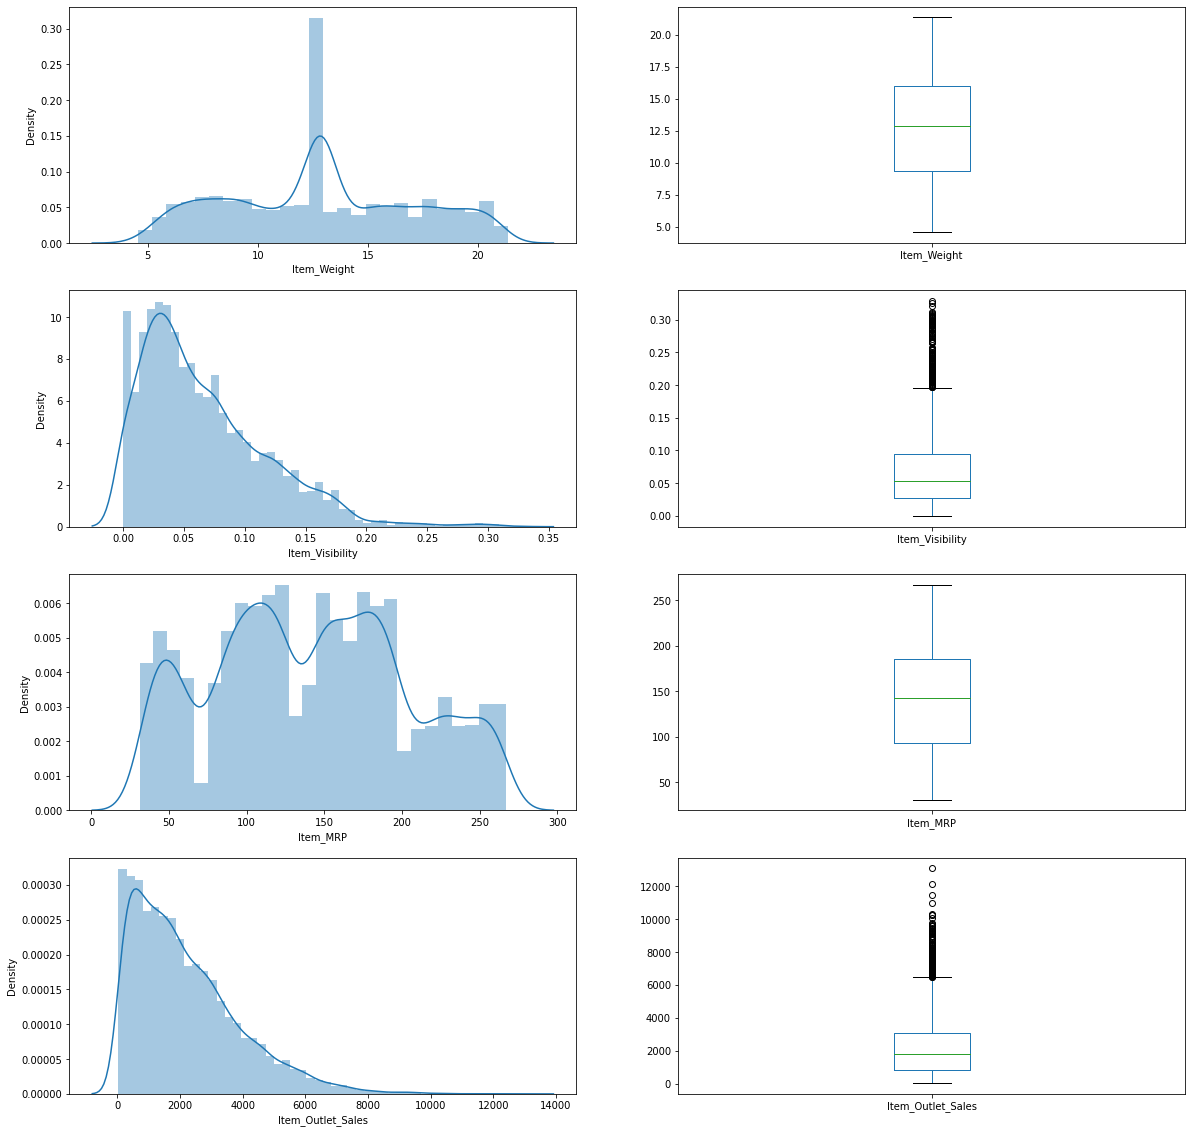

In [ ]:
# Plotting the graph of numerical variables

plt.figure(1)

plt.subplot(4,2,1)
sns.distplot(train_data["Item_Weight"],hist=True)

plt.subplot(4,2,2)
train_data["Item_Weight"].plot.box(figsize = (20,20))

plt.subplot(4,2,3)
sns.distplot(train_data["Item_Visibility"],hist=True)

plt.subplot(4,2,4)
train_data["Item_Visibility"].plot.box(figsize = (20,20))


plt.subplot(4,2,5)
sns.distplot(train_data["Item_MRP"],hist=True)

plt.subplot(4,2,6)
train_data["Item_MRP"].plot.box(figsize = (20,20))

plt.subplot(4,2,7)
sns.distplot(train_data["Item_Outlet_Sales"],hist=True)

plt.subplot(4,2,8)
train_data["Item_Outlet_Sales"].plot.box(figsize = (20,20))

# **Bivariate analysis**

After looking at each variables individually in univariate analysis, we will now explore them with respect to the target variable i.e. Item_Outlet_Sales. But before moving on with analysis, let's discuss what's exactly is bivariate analysis. <br>
Bivariate analysis means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

Let us first analyze our categorical explanatory variables with respect to our target variable and observe if there is any relationshi[p between the two.

**Categorical Explanatory Variable v/s Target Variable**

Let's visualize Item_Fat_Content with respect to Item_Outlet_Sales by plotting bargraph and boxplot.

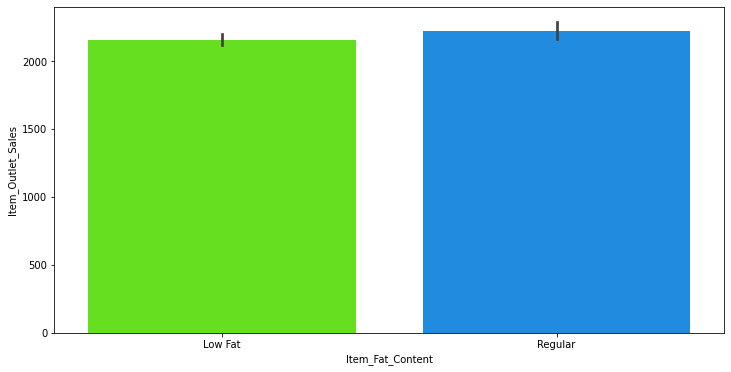

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['Item_Fat_Content'], y=train_data['Item_Outlet_Sales'], data=train_data, palette='gist_rainbow')

In [ ]:
fig = px.box(train_data, x='Item_Fat_Content', y="Item_Outlet_Sales", color='Item_Fat_Content')
fig.show()

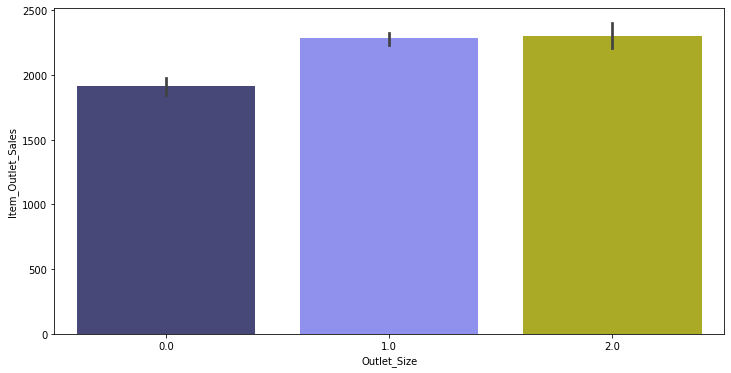

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['Outlet_Size'], y=train_data['Item_Outlet_Sales'], data=train_data, palette='gist_stern')

px.bar(train_data, x= 'Outlet_Size', y="Item_Outlet_Sales", color='Outlet_Size')

In [ ]:
train_data["Outlet_Size"].replace(0,'Small',inplace=True)
train_data["Outlet_Size"].replace(1,'Medium',inplace=True)
train_data["Outlet_Size"].replace(2,'High',inplace=True)

In [ ]:
fig = px.box(train_data, x='Outlet_Size', y="Item_Outlet_Sales", color='Outlet_Size')
fig.show()

Text(0.5, 1.0, 'Item_Outlet_Sales wrt Item_Type')

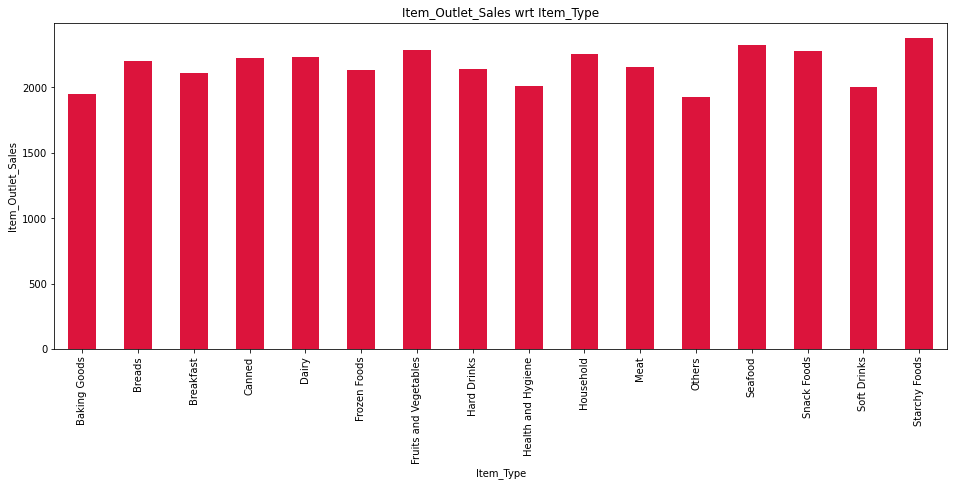

In [74]:
# Grouping Item_Type wrt Item_Outlet_Sales and then plotting the barchart for the same

plt.figure(figsize=(16,6))
train_data.groupby("Item_Type")["Item_Outlet_Sales"].mean().plot.bar(align="center", color = "Crimson")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sales wrt Item_Type")

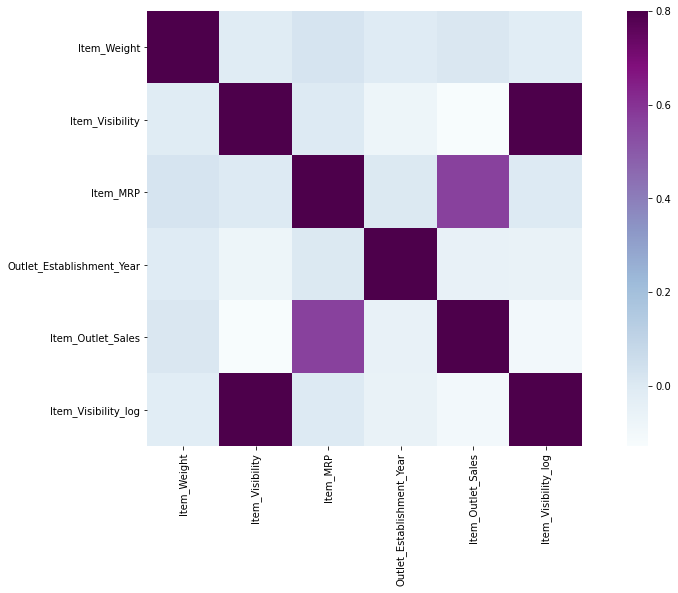

In [89]:
#Finding correlation and visualize it by heatmap
matrix = train_data.corr()
f,ax = plt.subplots(figsize=(16,8))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")